In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
#%pip install -e /Users/ElenaCero/Desktop/Polit/9.semester/GEModelTools

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass 

**Question 1**

In [2]:
model = HANCModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss

#Steady state values
ss.r = 0.02
ss.w = 1.0

#Transfer to households which i first used in question 5. 
ss.chi=0.0 #For question 1-4 chi is set to zero.


Household Problem

In [4]:
#Solve Household problem
model.solve_hh_ss(do_print=True)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


household problem in ss solved in 4.8 secs [340 iterations]


In [5]:
#Simulate Household problem
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 2.2 secs [395 iterations]


In [6]:
#Checking Grids
print(par.varphi_grid)
print(par.zeta_grid)

[0.9 0.9 1.1 1.1]
[0.9 1.1 0.9 1.1]


Stationary Equilibrium

In [7]:
from steady_state import obj_ss

Kappa_vec = np.linspace(5,6,7)
clearing_A_vec = np.zeros(Kappa_vec.size)
for i,Kappa in enumerate(Kappa_vec):
    clearing_A_vec[i] = obj_ss(Kappa,model,do_print=False)
    print(f'{Kappa = :.2f} = {clearing_A_vec[i] = :.2f}')

x=  5.0000 clearing_A= 15.7267 r= -0.0028 w=  1.1345 A_hh=  0.3239 K=  5.2462 B=-20.6490 L_hh=  1.0492
Kappa = 5.00 = clearing_A_vec[i] = 15.73
x=  5.1667 clearing_A=  6.8157 r= -0.0050 w=  1.1457 A_hh=  0.2681 K=  5.4041 B=-11.9517 L_hh=  1.0460
Kappa = 5.17 = clearing_A_vec[i] = 6.82
x=  5.3333 clearing_A=  3.4000 r= -0.0071 w=  1.1566 A_hh=  0.2239 K=  5.5610 B= -8.7372 L_hh=  1.0427
Kappa = 5.33 = clearing_A_vec[i] = 3.40
x=  5.5000 clearing_A=  1.5400 r= -0.0090 w=  1.1674 A_hh=  0.1896 K=  5.7172 B= -7.0676 L_hh=  1.0395
Kappa = 5.50 = clearing_A_vec[i] = 1.54
x=  5.6667 clearing_A=  0.3363 r= -0.0109 w=  1.1779 A_hh=  0.1615 K=  5.8726 B= -6.0474 L_hh=  1.0363
Kappa = 5.67 = clearing_A_vec[i] = 0.34
x=  5.8333 clearing_A= -0.5280 r= -0.0127 w=  1.1882 A_hh=  0.1381 K=  6.0273 B= -5.3613 L_hh=  1.0333
Kappa = 5.83 = clearing_A_vec[i] = -0.53
x=  6.0000 clearing_A= -1.1934 r= -0.0144 w=  1.1982 A_hh=  0.1186 K=  6.1816 B= -4.8696 L_hh=  1.0303
Kappa = 6.00 = clearing_A_vec[i] = -1

In [8]:
model.find_ss(do_print=True)

x=  2.9308 clearing_A= 14.7720 r=  0.0413 w=  0.9665 A_hh= 15.9411 K=  2.0137 B= -0.8445 L_hh=  0.6871
x=  4.7940 clearing_A=-374.2533 r=  0.0001 w=  1.1202 A_hh=  0.4148 K=  5.0490 B=369.6191 L_hh=  1.0532
x=  3.0016 clearing_A= 10.0303 r=  0.0390 w=  0.9734 A_hh= 11.8682 K=  2.3876 B= -0.5498 L_hh=  0.7955
x=  3.1473 clearing_A=  4.4625 r=  0.0345 w=  0.9874 A_hh=  7.3348 K=  2.9066 B= -0.0343 L_hh=  0.9235
x=  3.9707 clearing_A= -5.6296 r=  0.0143 w=  1.0587 A_hh=  1.3126 K=  4.2139 B=  2.7284 L_hh=  1.0612
x=  3.5114 clearing_A= -1.6063 r=  0.0245 w=  1.0203 A_hh=  3.0229 K=  3.6359 B=  0.9933 L_hh=  1.0355
x=  3.4150 clearing_A= -0.4889 r=  0.0270 w=  1.0118 A_hh=  3.7208 K=  3.4827 B=  0.7269 L_hh=  1.0198
x=  3.3770 clearing_A=  0.0153 r=  0.0280 w=  1.0085 A_hh=  4.0558 K=  3.4168 B=  0.6236 L_hh=  1.0118
x=  3.3782 clearing_A= -0.0006 r=  0.0280 w=  1.0086 A_hh=  4.0450 K=  3.4189 B=  0.6268 L_hh=  1.0120
x=  3.3781 clearing_A= -0.0000 r=  0.0280 w=  1.0086 A_hh=  4.0454 K=  3

**Question 2**

Steady State variables

In [9]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Y              : 1.4581
C              : 0.8163
I              : 0.3419
Gamma          : nan
K              : 3.4188
L              : 1.0120
I_B            : nan
B              : 0.6266
G              : 0.3000
wt             : nan
rt             : nan
rK             : 0.1280
w              : 1.0086
r              : 0.0280
Kappa          : 3.3781
rB             : 0.0280
tau_a          : nan
tau_l          : nan
A_hh           : 4.0454
C_hh           : 0.8163
L_hh           : 1.0120
clearing_A     : -0.0000
clearing_C     : nan
clearing_L     : nan
chi            : 0.0000
ELL_hh         : 1.0776
U_hh           : -2.0043


Household behavior

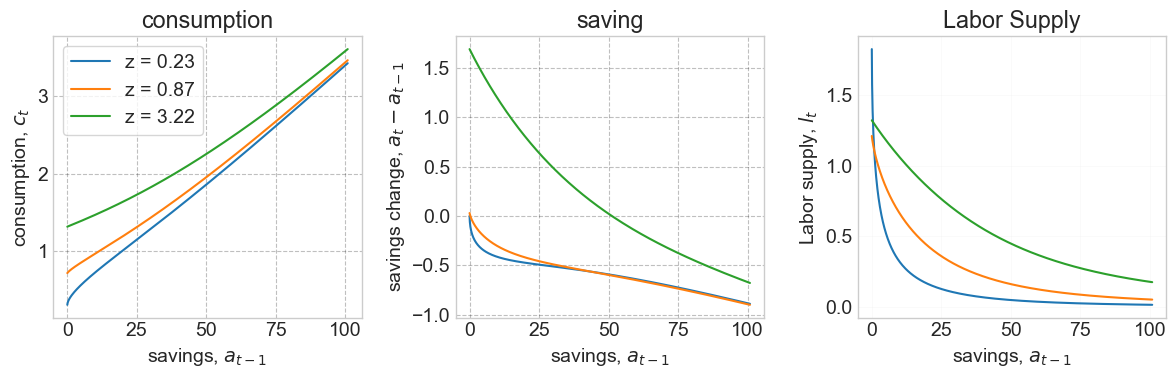

In [10]:
fig = plt.figure(figsize=(12,4),dpi=100)

I = par.a_grid < 500

# a. consumption
ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'z = {z:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.a[0,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')

# Labor Supply

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title(f'Labor Supply')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'z = {z:.2f}')

#ax.plot(par.a_grid,ss.ell[0,i_z,I])

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('Labor supply, $l_t$')

fig.tight_layout()

Distribution of Households

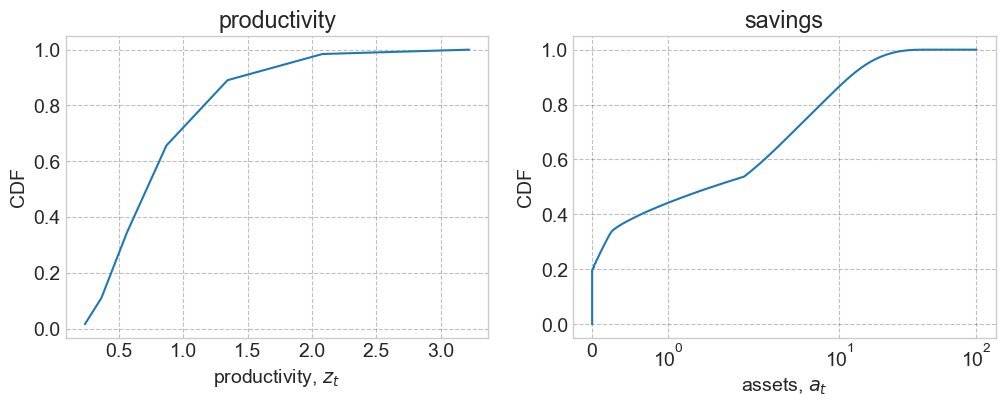

In [11]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')



**Question 3**

In [12]:
# Illustrations of how changes in the tax rates affect the stationary equilibrium
tau_vec_a = [0.0,0.04,0.08,0.16,0.20,0.24,0.28,0.32]
ss.U_hh = np.sum(ss.u*ss.D)
U_hh = np.zeros(len(tau_vec_a))
B = np.zeros(len(tau_vec_a))
r = np.zeros(len(tau_vec_a))
K = np.zeros(len(tau_vec_a))
Y = np.zeros(len(tau_vec_a))
C = np.zeros(len(tau_vec_a))
w = np.zeros(len(tau_vec_a))
ss.L_hh = np.sum(ss.l*ss.D)
L_hh = np.zeros(len(tau_vec_a))
ss.A_hh = np.sum(ss.a*ss.D)
A_hh = np.zeros(len(tau_vec_a))

for i,tau in enumerate(tau_vec_a):
    
    model_tau_a = HANCModelClass(name='range',par={'tau_a':tau})
    
    model_tau_a.find_ss(do_print=False)
    
    print(f'{model_tau_a.ss.r = :8.3f}')
    print(f'{model_tau_a.ss.B = :8.3f}')
    print(f'{model_tau_a.ss.U_hh = :12.8f}\n')
    
    U_hh[i] = model_tau_a.ss.U_hh
    B[i] = model_tau_a.ss.B
    r[i] = model_tau_a.ss.r
    K[i] = model_tau_a.ss.K
    Y[i] = model_tau_a.ss.Y
    C[i] = model_tau_a.ss.C
    w[i] = model_tau_a.ss.w
    L_hh[i] = model_tau_a.ss.L_hh
    A_hh[i]= model_tau_a.ss.A_hh


x=  2.9308 clearing_A= 52.1343 r=  0.0413 w=  0.9665 A_hh= 47.0546 K=  0.6421 B= -5.7218 L_hh=  0.2191
x=  4.7940 clearing_A=-374.2031 r=  0.0001 w=  1.1202 A_hh=  0.4154 K=  5.0490 B=369.5696 L_hh=  1.0532
x=  3.1587 clearing_A=  9.5258 r=  0.0341 w=  0.9884 A_hh= 10.5752 K=  2.6236 B= -1.5742 L_hh=  0.8306
x=  3.2083 clearing_A=  7.2525 r=  0.0327 w=  0.9931 A_hh=  8.8909 K=  2.8164 B= -1.1780 L_hh=  0.8779
x=  4.0012 clearing_A= -5.5277 r=  0.0137 w=  1.0611 A_hh=  1.4165 K=  4.2357 B=  2.7085 L_hh=  1.0586
x=  3.6582 clearing_A= -2.0832 r=  0.0210 w=  1.0330 A_hh=  2.7528 K=  3.7988 B=  1.0371 L_hh=  1.0384
x=  3.4971 clearing_A=  0.0603 r=  0.0249 w=  1.0191 A_hh=  3.9670 K=  3.5369 B=  0.3698 L_hh=  1.0114
x=  3.5017 clearing_A= -0.0102 r=  0.0248 w=  1.0195 A_hh=  3.9240 K=  3.5451 B=  0.3891 L_hh=  1.0124
x=  3.5010 clearing_A= -0.0000 r=  0.0248 w=  1.0194 A_hh=  3.9302 K=  3.5439 B=  0.3863 L_hh=  1.0123
x=  3.5010 clearing_A=  0.0000 r=  0.0248 w=  1.0194 A_hh=  3.9302 K=  3

Text(0.5, 0, '$\\tau_{ss}^{a}$')

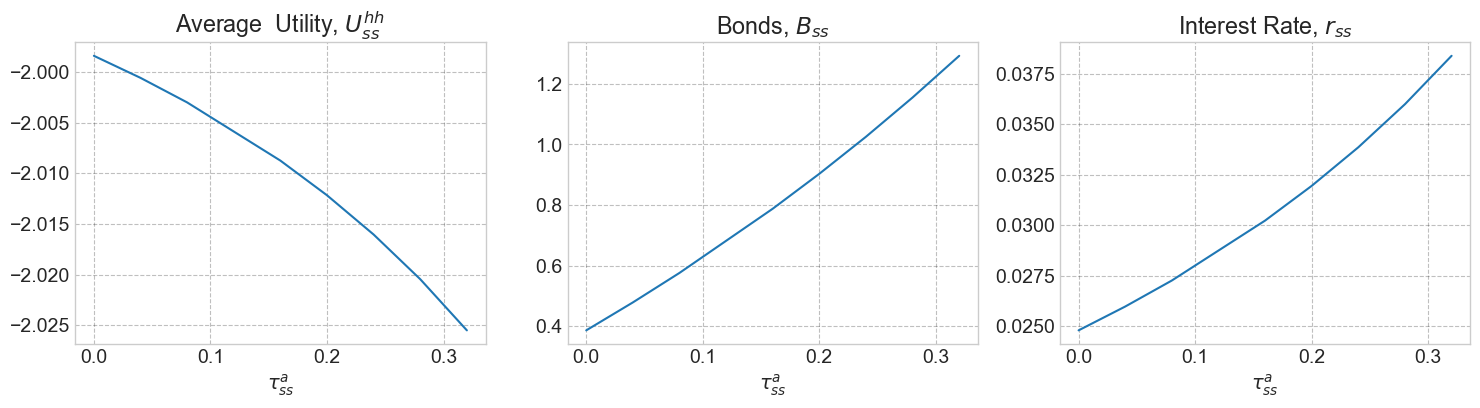

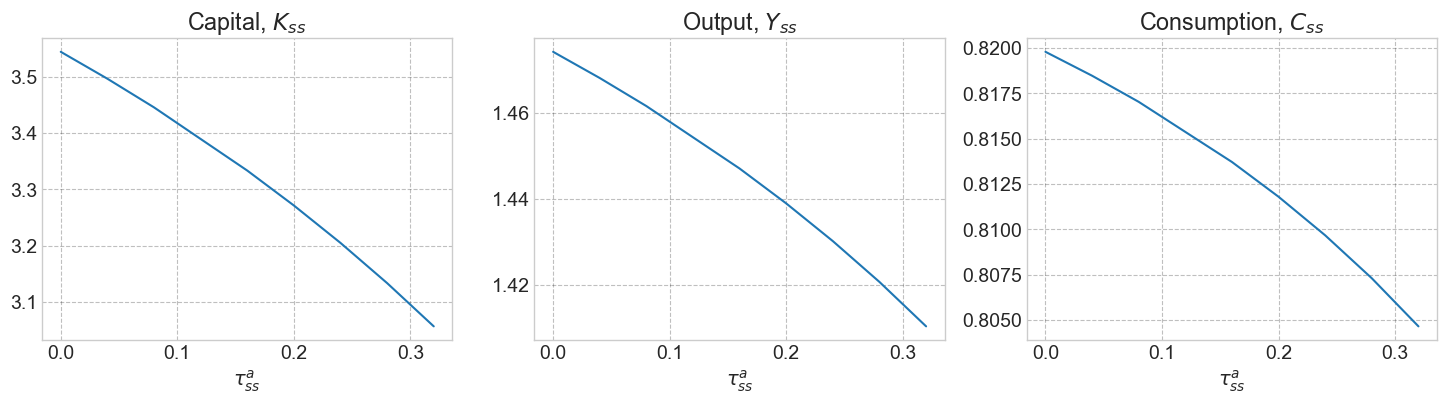

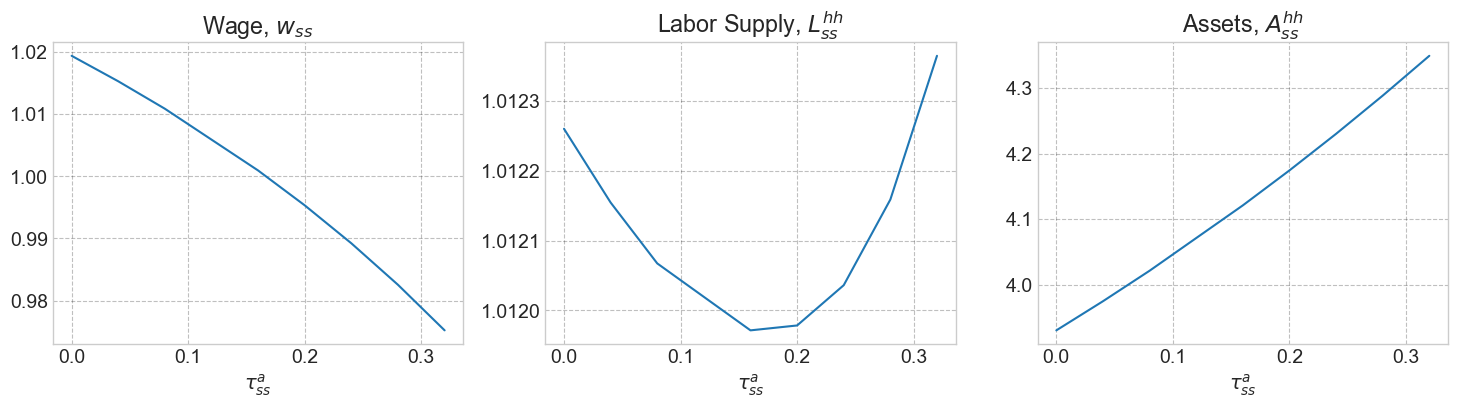

In [13]:
#Plotting the figures
fig = plt.figure(figsize=(18,4),dpi=100)

ax = fig.add_subplot(1,3,1)

ax.set_title('Average  Utility, $U_{ss}^{hh}$')
ax.plot(tau_vec_a,U_hh,'-')
ax.set_xlabel('$\\tau_{ss}^a$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,2)

ax.set_title('Bonds, $B_{ss}$')
ax.plot(tau_vec_a,B,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title('Interest Rate, $r_{ss}$')
ax.plot(tau_vec_a,r,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

fig = plt.figure(figsize=(18,4),dpi=100)

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,1)

ax.set_title('Capital, $K_{ss}$')
ax.plot(tau_vec_a,K,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

ax = fig.add_subplot(1,3,2)

ax.set_title('Output, $Y_{ss}$')
ax.plot(tau_vec_a,Y,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title('Consumption, $C_{ss}$')
ax.plot(tau_vec_a,C,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

fig = plt.figure(figsize=(18,4),dpi=100)

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,1)

ax.set_title('Wage, $w_{ss}$')
ax.plot(tau_vec_a,w,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,2)

ax.set_title('Labor Supply, $L_{ss}^{hh}$')
ax.plot(tau_vec_a,L_hh,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

ax = fig.add_subplot(1,3,3)


ax.set_title('Assets, $A_{ss}^{hh}$')
ax.plot(tau_vec_a,A_hh,'-')
ax.set_xlabel('$\\tau_{ss}^{a}$')

In [14]:
tau_vec_l = [0.26, 0.30, 0.34, 0.38, 0.42, 0.46, 0.50, 0.54, 0.58, 0.62, 0.66]
ss.U_hh = np.sum(ss.u*ss.D)
U_hh = np.zeros(len(tau_vec_l))
B = np.zeros(len(tau_vec_l))
r = np.zeros(len(tau_vec_l))
K = np.zeros(len(tau_vec_l))
Y = np.zeros(len(tau_vec_l))
C = np.zeros(len(tau_vec_l))
w = np.zeros(len(tau_vec_l))
ss.L_hh = np.sum(ss.l*ss.D)
L_hh = np.zeros(len(tau_vec_l))
A_hh = np.zeros(len(tau_vec_l))

for i,tau in enumerate(tau_vec_l):
    
    model_tau_l = HANCModelClass(name='range',par={'tau_l':tau})
    
    model_tau_l.find_ss(do_print=False)
    
    print(f'{model_tau_l.ss.r = :8.3f}')
    print(f'{model_tau_l.ss.B = :8.3f}')
    print(f'{model_tau_l.ss.U_hh = :12.8f}\n')
    
    U_hh[i] = model_tau_l.ss.U_hh
    B[i] = model_tau_l.ss.B
    r[i] = model_tau_l.ss.r
    K[i] = model_tau_l.ss.K
    Y[i] = model_tau_l.ss.Y
    C[i] = model_tau_l.ss.C
    w[i] = model_tau_l.ss.w
    L_hh[i] = model_tau_l.ss.L_hh
    A_hh[i] = model_tau_l.ss.A_hh
    

x=  2.9308 clearing_A= 16.0698 r=  0.0413 w=  0.9665 A_hh= 16.5427 K=  1.9767 B= -1.5038 L_hh=  0.6745
x=  4.7940 clearing_A=-12.2737 r=  0.0001 w=  1.1202 A_hh=  0.4305 K=  4.9564 B=  7.7479 L_hh=  1.0339
x=  3.9872 clearing_A= -2.0387 r=  0.0139 w=  1.0600 A_hh=  1.3265 K=  4.1544 B= -0.7892 L_hh=  1.0419
x=  3.8446 clearing_A= -1.4983 r=  0.0169 w=  1.0485 A_hh=  1.6780 K=  3.9960 B= -0.8197 L_hh=  1.0394
x=  3.4849 clearing_A=  0.7223 r=  0.0252 w=  1.0180 A_hh=  3.3165 K=  3.5296 B= -0.9353 L_hh=  1.0128
x=  3.6019 clearing_A= -0.1962 r=  0.0223 w=  1.0282 A_hh=  2.6127 K=  3.6965 B= -0.8876 L_hh=  1.0263
x=  3.5769 clearing_A= -0.0207 r=  0.0229 w=  1.0260 A_hh=  2.7451 K=  3.6624 B= -0.8967 L_hh=  1.0239
x=  3.5740 clearing_A=  0.0001 r=  0.0230 w=  1.0258 A_hh=  2.7608 K=  3.6585 B= -0.8978 L_hh=  1.0236
x=  3.5740 clearing_A= -0.0000 r=  0.0230 w=  1.0258 A_hh=  2.7607 K=  3.6585 B= -0.8977 L_hh=  1.0236
x=  3.5740 clearing_A= -0.0000 r=  0.0230 w=  1.0258 A_hh=  2.7607 K=  3.

Text(0.5, 0, '$\\tau_{ss}^{l}$')

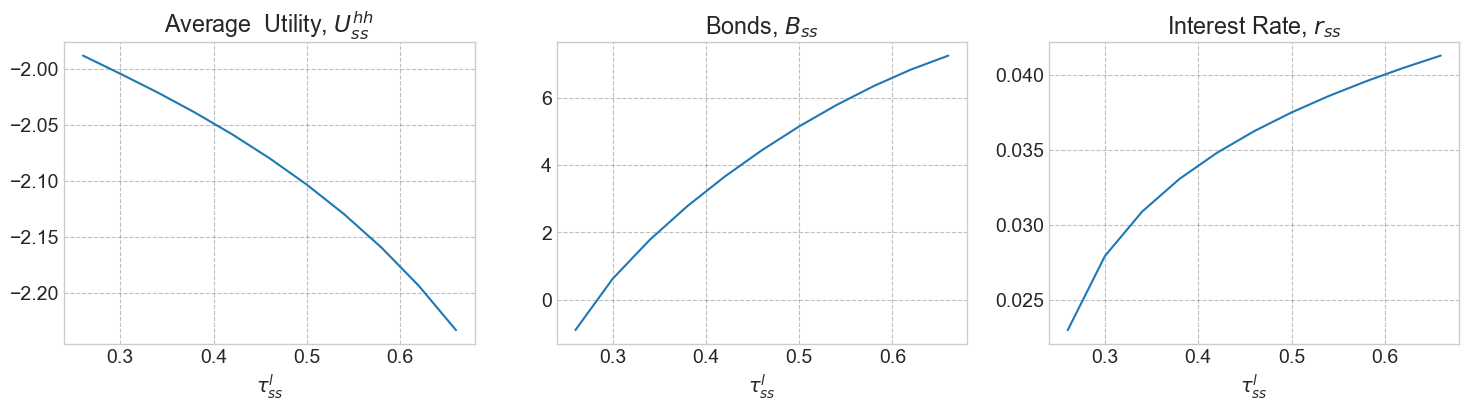

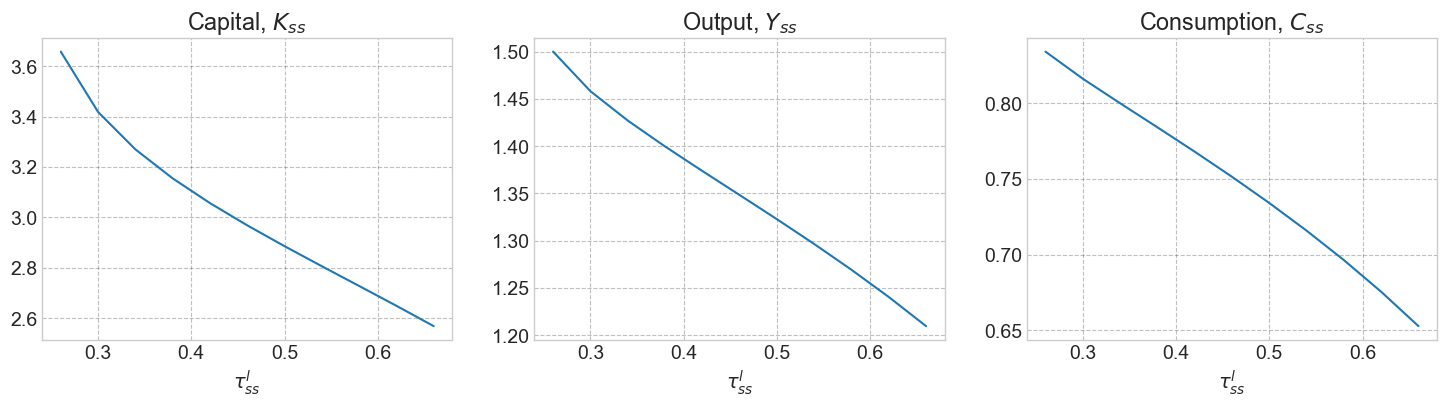

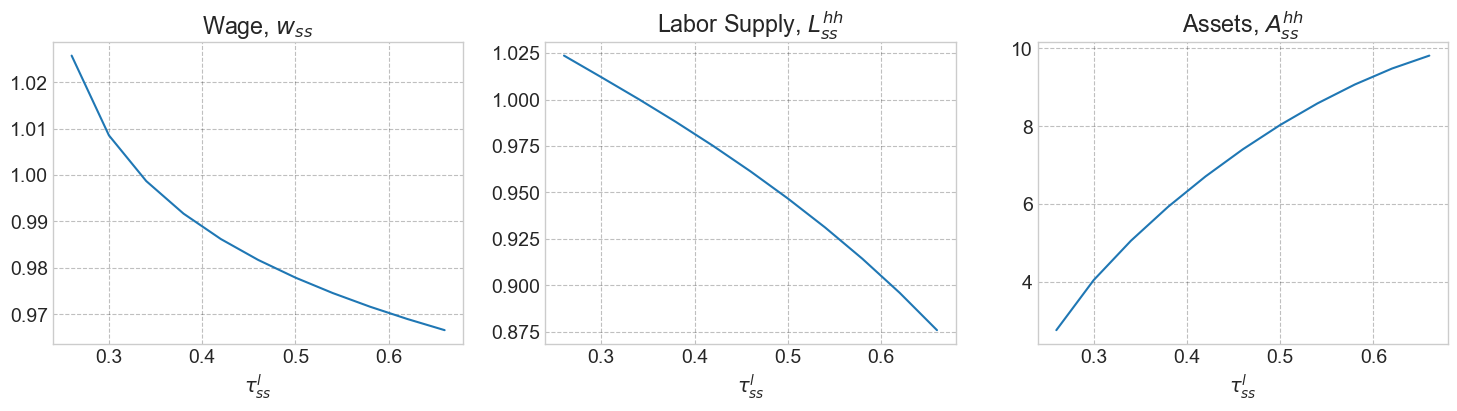

In [15]:
fig = plt.figure(figsize=(18,4),dpi=100)

ax = fig.add_subplot(1,3,1)

ax.set_title('Average  Utility, $U_{ss}^{hh}$')
ax.plot(tau_vec_l,U_hh,'-')
ax.set_xlabel('$\\tau_{ss}^l$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,2)

ax.set_title('Bonds, $B_{ss}$')
ax.plot(tau_vec_l,B,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title('Interest Rate, $r_{ss}$')
ax.plot(tau_vec_l,r,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')


fig = plt.figure(figsize=(18,4),dpi=100)

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,1)

ax.set_title('Capital, $K_{ss}$')
ax.plot(tau_vec_l,K,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

ax = fig.add_subplot(1,3,2)

ax.set_title('Output, $Y_{ss}$')
ax.plot(tau_vec_l,Y,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title('Consumption, $C_{ss}$')
ax.plot(tau_vec_l,C,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

fig = plt.figure(figsize=(18,4),dpi=100)


#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,1)

ax.set_title('Wage, $w_{ss}$')
ax.plot(tau_vec_l,w,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,2)

ax.set_title('Labor Supply, $L_{ss}^{hh}$')
ax.plot(tau_vec_l,L_hh,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

ax = fig.add_subplot(1,3,3)

ax.set_title('Assets, $A_{ss}^{hh}$')
ax.plot(tau_vec_l,A_hh,'-')
ax.set_xlabel('$\\tau_{ss}^{l}$')

## Question 5

In [16]:
par.chi_ss=0.04 #transfer to hh

model.solve_hh_ss(do_print=True)


household problem in ss solved in 1.6 secs [428 iterations]


In [17]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.1 secs [598 iterations]


In [18]:
from steady_state import obj_ss

Kappa_vec = np.linspace(5,6,7)
clearing_A_vec = np.zeros(Kappa_vec.size)
for i,Kappa in enumerate(Kappa_vec):
    clearing_A_vec[i] = obj_ss(Kappa,model,do_print=False)
    print(f'{Kappa = :.2f} = {clearing_A_vec[i] = :.2f}')

x=  5.0000 clearing_A= -2.7357 r= -0.0028 w=  1.1345 A_hh=  0.2928 K=  5.0794 B= -2.0509 L_hh=  1.0159
Kappa = 5.00 = clearing_A_vec[i] = -2.74
x=  5.1667 clearing_A= -3.3777 r= -0.0050 w=  1.1457 A_hh=  0.2419 K=  5.2333 B= -1.6136 L_hh=  1.0129
Kappa = 5.17 = clearing_A_vec[i] = -3.38
x=  5.3333 clearing_A= -3.7244 r= -0.0071 w=  1.1566 A_hh=  0.2028 K=  5.3863 B= -1.4590 L_hh=  1.0099
Kappa = 5.33 = clearing_A_vec[i] = -3.72
x=  5.5000 clearing_A= -3.9828 r= -0.0090 w=  1.1674 A_hh=  0.1715 K=  5.5385 B= -1.3843 L_hh=  1.0070
Kappa = 5.50 = clearing_A_vec[i] = -3.98
x=  5.6667 clearing_A= -4.2012 r= -0.0109 w=  1.1779 A_hh=  0.1457 K=  5.6901 B= -1.3432 L_hh=  1.0041
Kappa = 5.67 = clearing_A_vec[i] = -4.20
x=  5.8333 clearing_A= -4.3973 r= -0.0127 w=  1.1882 A_hh=  0.1244 K=  5.8412 B= -1.3195 L_hh=  1.0013
Kappa = 5.83 = clearing_A_vec[i] = -4.40
x=  6.0000 clearing_A= -4.5793 r= -0.0144 w=  1.1982 A_hh=  0.1065 K=  5.9917 B= -1.3058 L_hh=  0.9986
Kappa = 6.00 = clearing_A_vec[i] 

In [19]:
model.find_ss(do_print=True)

x=  2.9308 clearing_A= 15.1668 r=  0.0413 w=  0.9665 A_hh= 15.1911 K=  1.9836 B= -1.9594 L_hh=  0.6768
x=  4.7940 clearing_A=-22.5171 r=  0.0001 w=  1.1202 A_hh=  0.3756 K=  4.8875 B= 18.0052 L_hh=  1.0195
x=  3.6807 clearing_A= -0.7870 r=  0.0205 w=  1.0348 A_hh=  1.9950 K=  3.7478 B= -0.9658 L_hh=  1.0182
x=  3.6437 clearing_A= -0.5770 r=  0.0214 w=  1.0317 A_hh=  2.1413 K=  3.7016 B= -0.9833 L_hh=  1.0159
x=  3.5458 clearing_A=  0.0660 r=  0.0237 w=  1.0233 A_hh=  2.6027 K=  3.5724 B= -1.0357 L_hh=  1.0075
x=  3.5558 clearing_A= -0.0068 r=  0.0234 w=  1.0242 A_hh=  2.5496 K=  3.5862 B= -1.0299 L_hh=  1.0085
x=  3.5549 clearing_A= -0.0001 r=  0.0235 w=  1.0241 A_hh=  2.5545 K=  3.5849 B= -1.0304 L_hh=  1.0084
x=  3.5549 clearing_A=  0.0000 r=  0.0235 w=  1.0241 A_hh=  2.5545 K=  3.5849 B= -1.0304 L_hh=  1.0084
x=  3.5549 clearing_A= -0.0000 r=  0.0235 w=  1.0241 A_hh=  2.5545 K=  3.5849 B= -1.0304 L_hh=  1.0084
x=  3.5549 clearing_A=  0.0000 r=  0.0235 w=  1.0241 A_hh=  2.5545 K=  3.

In [20]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Y              : 1.4754
C              : 0.8169
I              : 0.3585
Gamma          : nan
K              : 3.5849
L              : 1.0084
I_B            : nan
B              : -1.0304
G              : 0.3000
wt             : nan
rt             : nan
rK             : 0.1235
w              : 1.0241
r              : 0.0235
Kappa          : 3.5549
rB             : 0.0235
tau_a          : nan
tau_l          : nan
A_hh           : 2.5545
C_hh           : 0.8169
L_hh           : 1.0084
clearing_A     : -0.0000
clearing_C     : nan
clearing_L     : nan
chi            : 0.0400
ELL_hh         : 1.0746
U_hh           : -1.9806
